# **Exploración de datos**

In [59]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 16,         
    'axes.titleweight': 'bold',   
    'font.family': 'Tahoma', 
})
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Estadística descriptiva y pruebas de normalidad
from scipy.stats import skew, kurtosis, jarque_bera, shapiro
from scipy import stats

# Modelado y diagnóstico estadístico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox

## Bitcoin (BTC)

Es una moneda digital descentralizada, también conocida como criptomoneda, que permite realizar transacciones electrónicas sin necesidad de intermediarios como bancos o gobiernos.

> Se analizan los datos después del preprocesamiento.

> Los registros utilizados van desde el 29 de enero de 2018 hasta el 6 de febrero de 2025.

In [60]:
# Lectura de archivo y selección de variables de interés
btc = pd.read_csv(r"C:\Users\Hp\MACHINE\MINI_PRY_2\data\BTC_all.csv")
btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce', format='%Y-%m-%d')


## 1. Precio de cierre

> El precio de cierre actual de Bitcoin (BTC) representa el último precio registrado al final del periodo de negociación más reciente. 

In [61]:
btc['Close'].describe()

count      2566.000000
mean      29264.276684
std       23644.382719
min        3211.720000
25%        8979.587500
50%       23067.550000
75%       43782.805000
max      106143.820000
Name: Close, dtype: float64

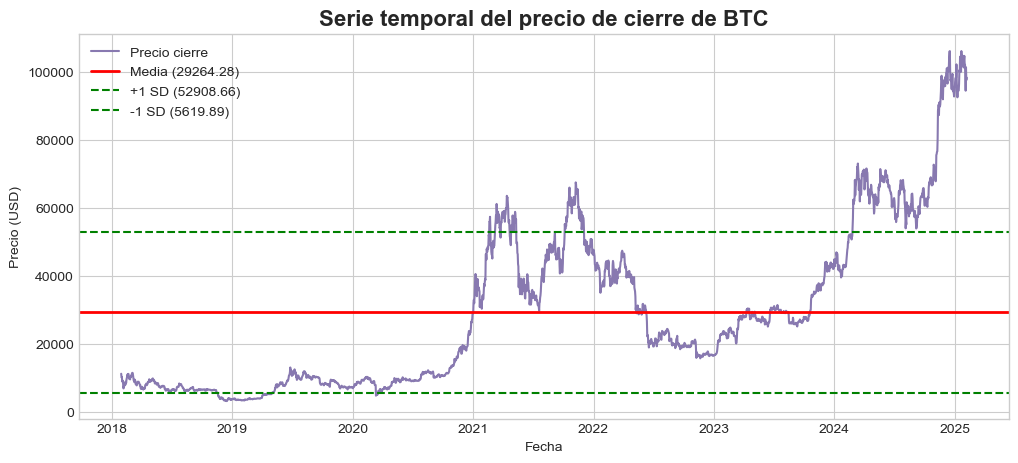

In [62]:
# [Gráfico] Serie temporal del precio de cierre
mean = btc['Close'].mean()
std = btc['Close'].std()

plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['Close'], label="Precio cierre", color = '#8879B0')
# Línea de la media
plt.axhline(mean, color='red', linestyle='-', linewidth=2, label=f"Media ({mean:.2f})")

# Líneas punteadas ±1 desviación estándar
plt.axhline(mean + std, color='green', linestyle='--', linewidth=1.5, label=f"+1 SD ({mean+std:.2f})")
plt.axhline(mean - std, color='green', linestyle='--', linewidth=1.5, label=f"-1 SD ({mean-std:.2f})")

plt.title("Serie temporal del precio de cierre de BTC")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

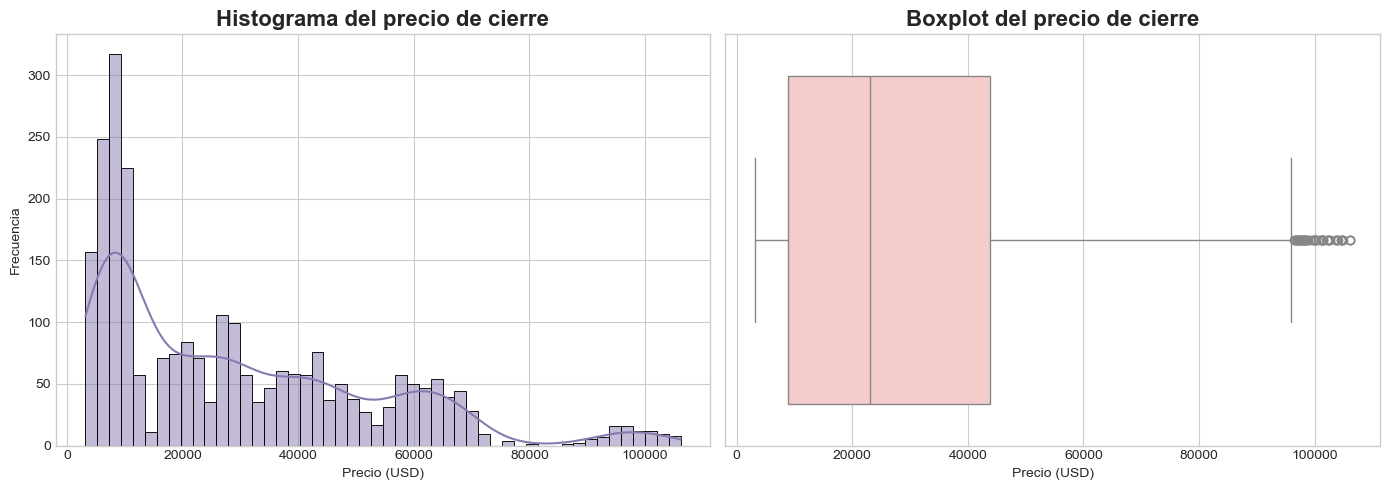

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
sns.histplot(btc['Close'], bins=50, kde=True, ax=axes[0], color='#8879B0')
axes[0].set_title('Histograma del precio de cierre')
axes[0].set_xlabel('Precio (USD)')
axes[0].set_ylabel('Frecuencia')

# Boxplot
sns.boxplot(x=btc['Close'], ax=axes[1], color='#FBC5C5')
axes[1].set_title('Boxplot del precio de cierre')
axes[1].set_xlabel('Precio (USD)')

plt.tight_layout()
plt.show()


De los 2,594 registros, el precio de cierre de BTC varía entre USD $3,211$ y USD $106,143$. El promedio en el periodo fue de USD $29,090$ ($\pm 23,576$), mientras que la mediana alcanzó USD $22,741$. La diferencia entre la mediana y la mediana, junto con la alta desviación estándar, evidencia una volatilidad extreman y sugiere que la distribución de precios no sigue una normalidad. 

En la serie temporal del precio de cierre, se observa que entre 2018 a 202 predominaban los valores más bajos. A partir del 2021 se registra un incremento abrupto, con precios que superan la media más de una desviación estándar. Posteriormente, entre finales de 2021 y 2022, el BTC experimenta una marcada alta variabilidad, seguida de una caída en 2023. Desde entonces, se aprecia una recuperación que continua. El año 2024 también muestra alta variabilidad. Al final se registra un pico de aumento hacia finales del 2025, con los valores más altos del registro. 

La distribución del precio presenta una clara asimetría positiva, impulsada por los valores máximos alcanzados en los últimos años, que como se muestra en el boxplot, representan valores atípicos.

## 2. Retornos logarítmicos

> Los _'log-returns'_ son una forma de medir el cambio porcentual entre dos precios consecutivos usando logaritmos naturales.

In [64]:
# Limpiar datos (eliminar NaN e infinitos)
returns = btc['log_return'].replace([np.inf, -np.inf], np.nan).dropna()
returns.describe()

count    2566.000000
mean        0.000824
std         0.035672
min        -0.502607
25%        -0.014141
50%         0.000658
75%         0.016119
max         0.178449
Name: log_return, dtype: float64

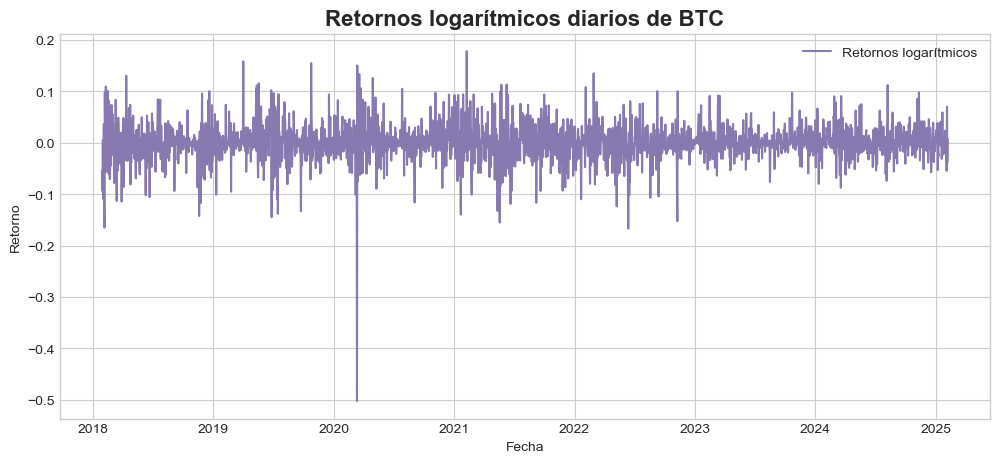

In [65]:
# [Gráfico] Serie distribución de los retornos logarítmicos.
plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['log_return'], label="Retornos logarítmicos", color = '#8879B0')
plt.title("Retornos logarítmicos diarios de BTC")
plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.legend()
plt.show()

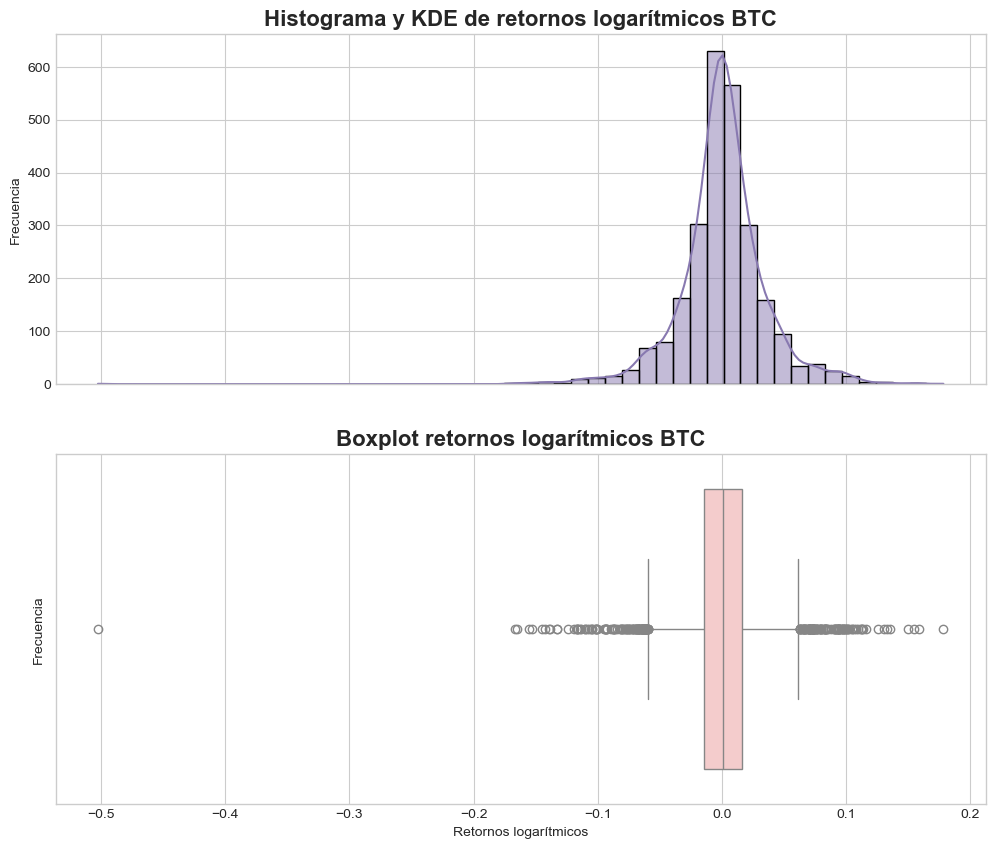

In [66]:
# [Gráfico] Distribución de los retornos logarítmicos
fig, axes = plt.subplots(2,1, figsize = (12,10), sharex = True)

sns.histplot(btc['log_return'], kde=True, ax=axes[0], color='#8879B0', bins=50)
axes[0].set_title("Histograma y KDE de retornos logarítmicos BTC")
axes[0].set_xlabel("Retornos logarítmicos")
axes[0].set_ylabel("Frecuencia")

sns.boxplot(x=btc['log_return'], color='#FBC5C5', ax=axes[1])
axes[1].set_title("Boxplot retornos logarítmicos BTC")
axes[1].set_xlabel("Retornos logarítmicos")
axes[1].set_ylabel("Frecuencia")

plt.show()

Los retornos logarítmicos diarios de Bitcoin muestran una distribución centrada en cero, con una media de 0.000824 y una mediana de 0.000658, lo que indica que en gran parte de los registros el cambio porcentual fue pequeño y positivo. Sin embargo, la desviación estándar del 3.57% revela una alta variación diaria. La mayoría de los retornos, el cambio de concentra entre entre el -1.41% a 1.61%. 

El gráfico de la serie temporal de los retornos muestra que la mayoría de los retornos se agrupan cerca del eje horizontal, pero hay varios picos y caídas abruptas que sobresalen del patrón general, considerados como valores atípicos por fuera del rango entre el -5.9% al 6.1%. El evento más notable ocurre alrededor de 2020, donde se observa una caída pronunciada que coincide con el mínimo estadístico de -0.5026, que refleja una caída diaria del 50.26%. El valor máximo alcanzado fue un alza del 17.84%. 


### Prueba de normalidad

In [ ]:
# [Test] Prueba de Shapiro y Jarque-Bera para verificar supuestos de normalidad

# Shapiro
shapiro_stat, shapiro_p = stats.shapiro(returns)

# Jarque-Bera
jb_stat, jb_p = jarque_bera(returns)

print("Prueba de normalidad sobre retornos logarítmicos")
print(f"Shapiro-Wilk: estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4e}")
print(f"Jarque-Bera: estadístico = {jb_stat:.4f}, p-valor = {jb_p:.4e}")

Prueba de normalidad sobre retornos logarítmicos
Shapiro-Wilk: estadístico = 0.9061, p-valor = 3.9137e-37
Jarque-Bera: estadístico = 34303.4305, p-valor = 0.0000e+00


De acuerdo con los resultados estadísticos de Jarque-Bera test, el estadístico es un valor muy grande, un p-valor muy cercano a 0, lo que lleva a rechazar la hipótesis de normalidad. 

In [ ]:
# [Test] Calcular asimetría y kurtosis
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)

print(f"Asimetría (Skewness): {skewness:.4f}")
print(f"Curtosis: {kurt:.4f}")

Asimetría (Skewness): -1.1404
Curtosis: 20.7663


La distribución de los retornos logarítmicos está sesgada a la izquierda, una marcada asimetría negativa. La curtosis es elevada, lo que sugiere una distribución con picos pronunciados y presencia significativa de valores extremos.

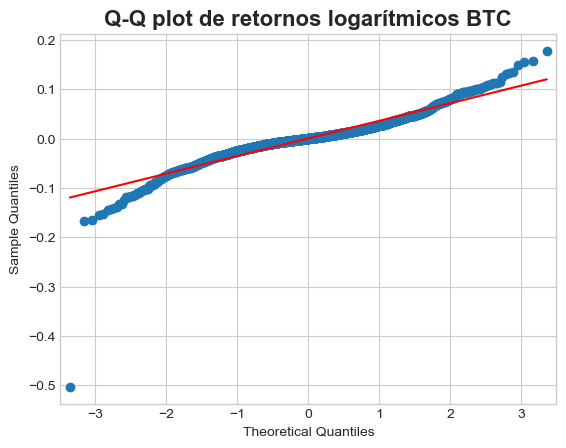

In [69]:
# QQ plot
sm.qqplot(btc['log_return'], line='s')
plt.title("Q-Q plot de retornos logarítmicos BTC")
plt.show()

El Q-Q plot evidencia que los retornos logarítmicos no siguen una distribución normal. Los puntos en las colas se alejan de la distribución teórica normal, relacionado con la presencia de colas pesadas. Los puntos en la parte inferior se desvían por debajo de la línea, indicando la asimetría negativa. Hay una cola más larga hacia los retornos negativos.

### Estacionariedad

In [ ]:
# [Test] Prueba ADF
adf_returns = adfuller(returns)
print("Prueba ADF en retornos:")
print(f"Estadístico ADF: {adf_returns[0]:.4f}")
print(f"p-valor: {adf_returns[1]:.4f}\n")

Prueba ADF en retornos:
Estadístico ADF: -24.0255
p-valor: 0.0000



La prueba Dickey-Fuller aumentada (ADF) para evaluar la presencia de raíz unitaria, evidencia en el estadístico alto y el p-valor 0, una fuerte estacionariedad en los retornos logarítmicos. 

### Función de autocorrelación (ACF) de retornos

La ACF (Autocorrelation Funtion) evalúa la dependencia temporal. 

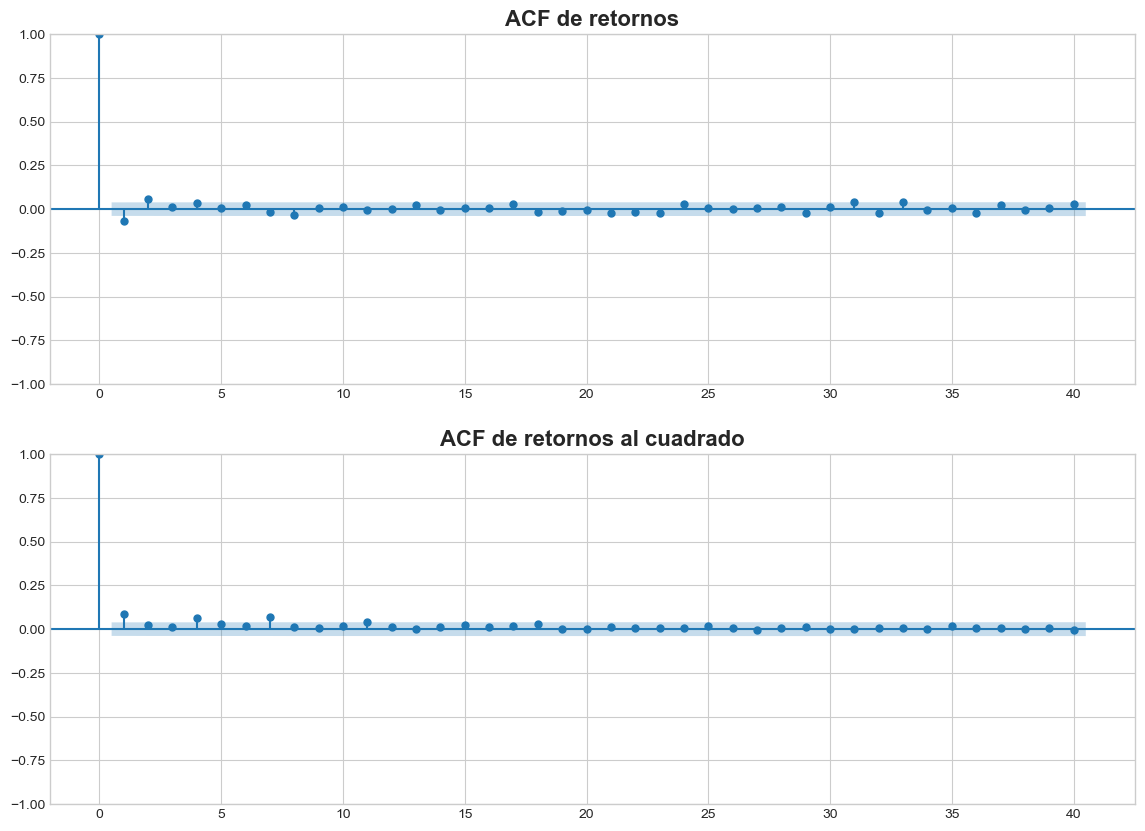

In [71]:
# [Gráfico] ACF de retornos
fig, axes = plt.subplots(2, 1, figsize=(14,10))
plot_acf(returns, lags=40, ax=axes[0])
axes[0].set_title("ACF de retornos")

plot_acf(returns**2, lags=40, ax=axes[1])
axes[1].set_title("ACF de retornos al cuadrado")
plt.show()


Los valores del autocorrelación están muy cerca de cero en todos los regazos, esto indica que los retornos no presentan una dependencia temporal significativa. Se comportan con ruido blanco, sin autocorrelación significativa, esto sugiere que no existen patrones lineales.

La autocorrelación en los retornos al cuadrado indica presencia de heterocedasticidad condicional, lo que sugiere que el cambio porcentual no es constante en el tiempo.

## 3. Volatilidad historica

> La volatilidad histórica es una medida que cuantifica la variabilidad de los retornos de un activo durante un periodo determinado.

In [72]:
# [Tabla] Resumen numérico de la volatilidad por ventana
tabla_vol = {}
ventanas = [7,14,21,28]

for dia in ventanas:
    col = f"Volatil_D{dia}"
    tabla_vol[f"{dia} días"] = btc[col].describe()

df_vol = pd.DataFrame(tabla_vol).T
df_vol = df_vol[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]  # Orden lógico
df_vol = df_vol.map(lambda x: f"{x:.4f}")
df_vol

,count,mean,std,min,25%,50%,75%,max
7 días,2566.0000,0.5856,0.3462,0.0584,0.3633,0.5222,0.7380,4.0397
14 días,2566.0000,0.6094,0.3057,0.1031,0.4127,0.5663,0.7254,3.0092
21 días,2566.0000,0.6209,0.2863,0.1252,0.4362,0.5775,0.7367,2.4849
28 días,2566.0000,0.6291,0.2728,0.1644,0.4576,0.5785,0.7365,2.1737


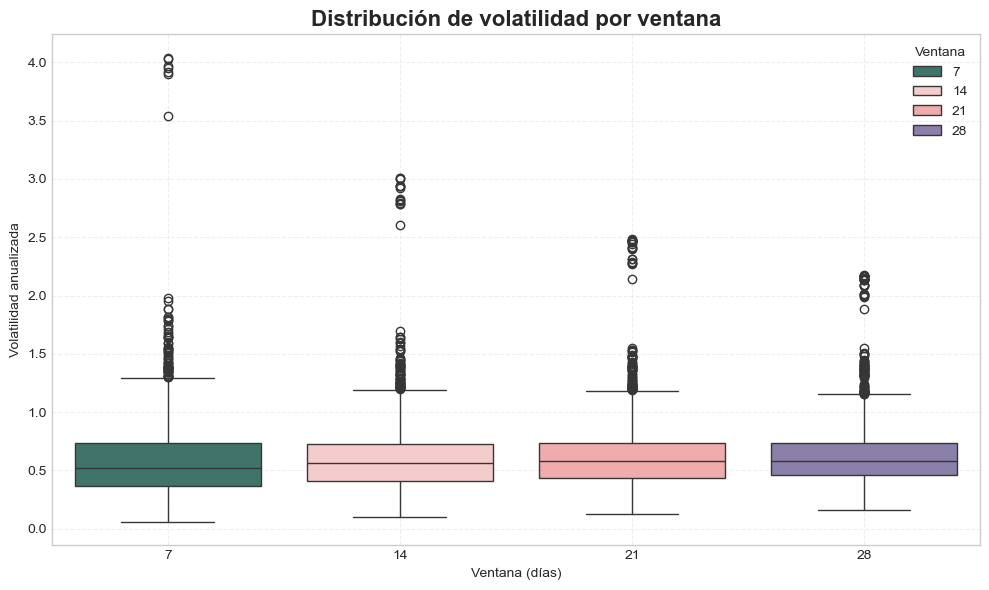

In [73]:
# [Gráfico] Distribución de volatilidad por ventana
vol_cols = [f"Volatil_D{v}" for v in ventanas]

df_volatilidad_largo = pd.melt(
    btc[vol_cols],
    var_name='Ventana',
    value_name='Volatilidad'
)

# 2. Limpiar etiquetas si deseas que se vean como "7", "14", etc.
df_volatilidad_largo['Ventana'] = df_volatilidad_largo['Ventana'].str.extract(r'(\d+)').astype(int)

# 3. Graficar los boxplots en un solo gráfico
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ventana', y='Volatilidad', data=df_volatilidad_largo, hue = 'Ventana', palette=['#377D71','#FBC5C5', '#FBA1A1', '#8879B0'])

plt.title('Distribución de volatilidad por ventana')
plt.xlabel('Ventana (días)')
plt.ylabel('Volatilidad anualizada')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

> Para este análisis se tienen en cuenta 4 ventanas móviles para el cálculo de la volatilidad histórica anualizada. 

Para la ventana de 7 días, la volatilidad varía entre el 5.84% al 403.97%, evidenciando alta inestabilidad del mercado en horizontes semanales. La media es 0.5856, con una desviación estándar de 0.3462, indicando una alta volatilidad. La mayoría de las observaciones se encuentran entre 36.33% al 73.80%. 

Para las ventanas de 14 a 28 días la volatilidad mínima se concentra entre el 10% al 16%, alcanzando volatilidades del 210 - 300 %, un rango mucho menor que los horizontes semanales. La media para esta ventana es una volatilidad del 60-62% con una desviación estándar de no más de 0.305. El 25% de las observaciones están por debajo del 41-45%, mientras que el 75% se encuentran por debajo del 72-73%.

Como se observa en el gráfico de caja y bigotes, para todas las ventanas se evidencia presencia de outliers sectorizados en dos grupos. Uno cercano a el bigote superior y el otro grupo cercano a los valores máximos.


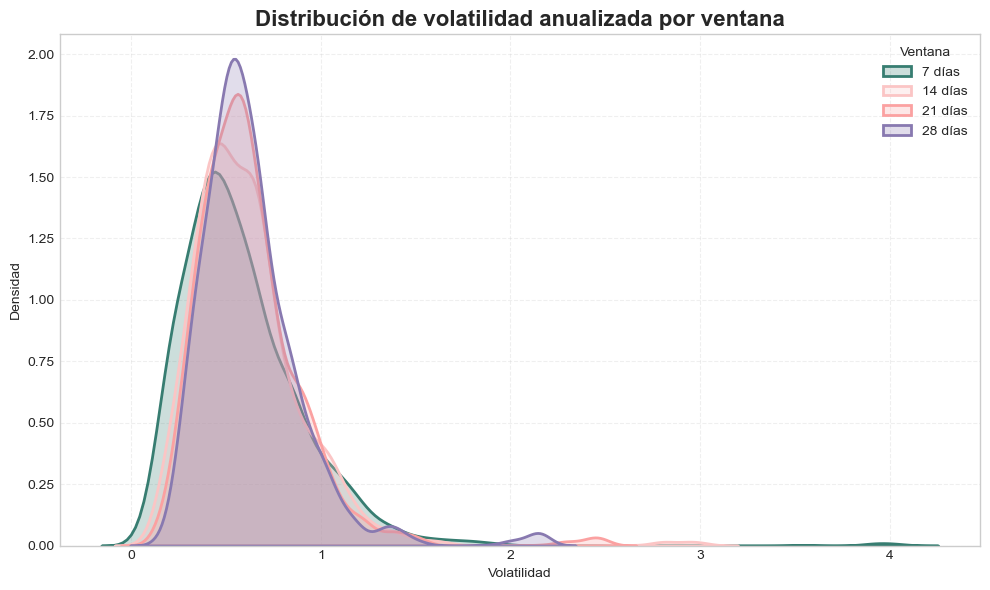

In [74]:
# [Gráfica] Distribución de densidad de la volatilidad por ventana
plt.figure(figsize=(10, 6))
colores=['#377D71','#FBC5C5', '#FBA1A1', '#8879B0']
for i, v in enumerate(ventanas):
    col = f"Volatil_D{v}"
    sns.kdeplot(btc[col].dropna(), label=f'{v} días', linewidth=2, fill=True, color = colores[i])

plt.title('Distribución de volatilidad anualizada por ventana')
plt.xlabel('Volatilidad')
plt.ylabel('Densidad')
plt.legend(title='Ventana')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

La distribución de la volatilidad anualizada varía según el horizonte de cálculo. Ventanas cortas (7 días) presentan mayor dispersión y sensibilidad a eventos extremos, mientras que ventanas largas (28 días) ofrecen estimaciones más estables. 

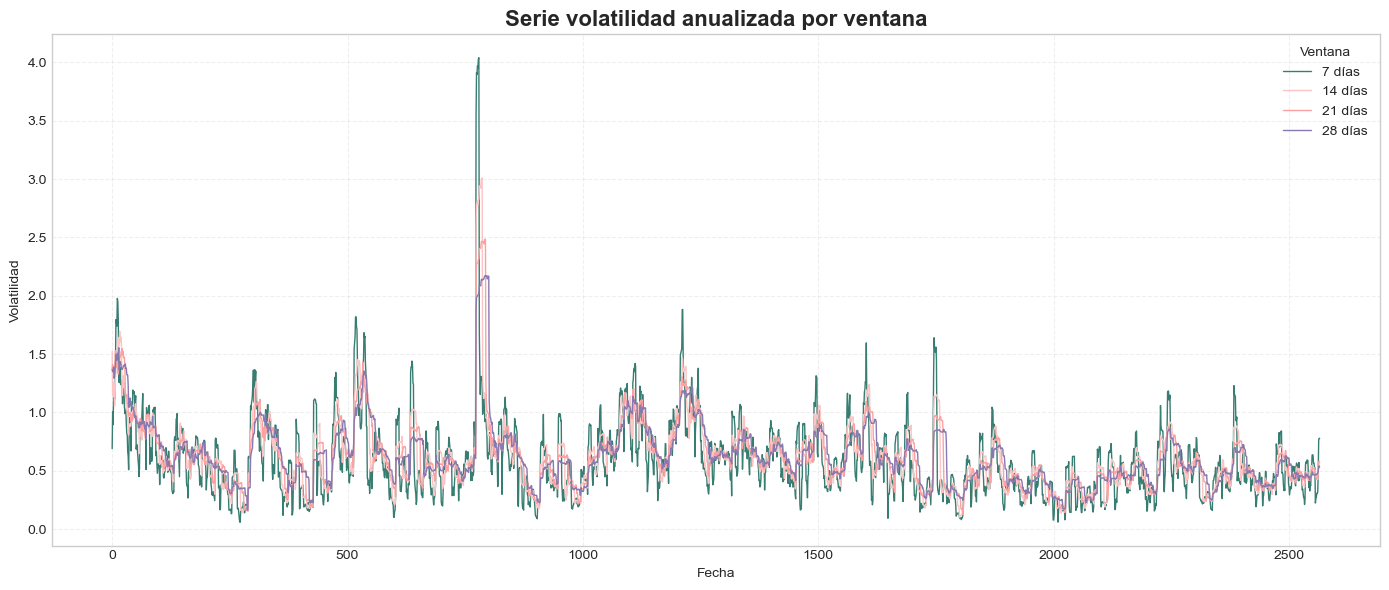

In [101]:
# [Gráfica] Serie: Volatilidad anualizada por ventana
plt.figure(figsize=(14, 6))
colores=['#377D71','#FBC5C5', '#FBA1A1', '#8879B0']
for i, v in enumerate(ventanas):
    plt.plot(btc.index, btc[f"Volatil_D{v}"], label=f'{v} días', linewidth=1, color=colores[i])

plt.title('Serie volatilidad anualizada por ventana')
plt.xlabel('Fecha')
plt.ylabel('Volatilidad')
plt.legend(title='Ventana')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

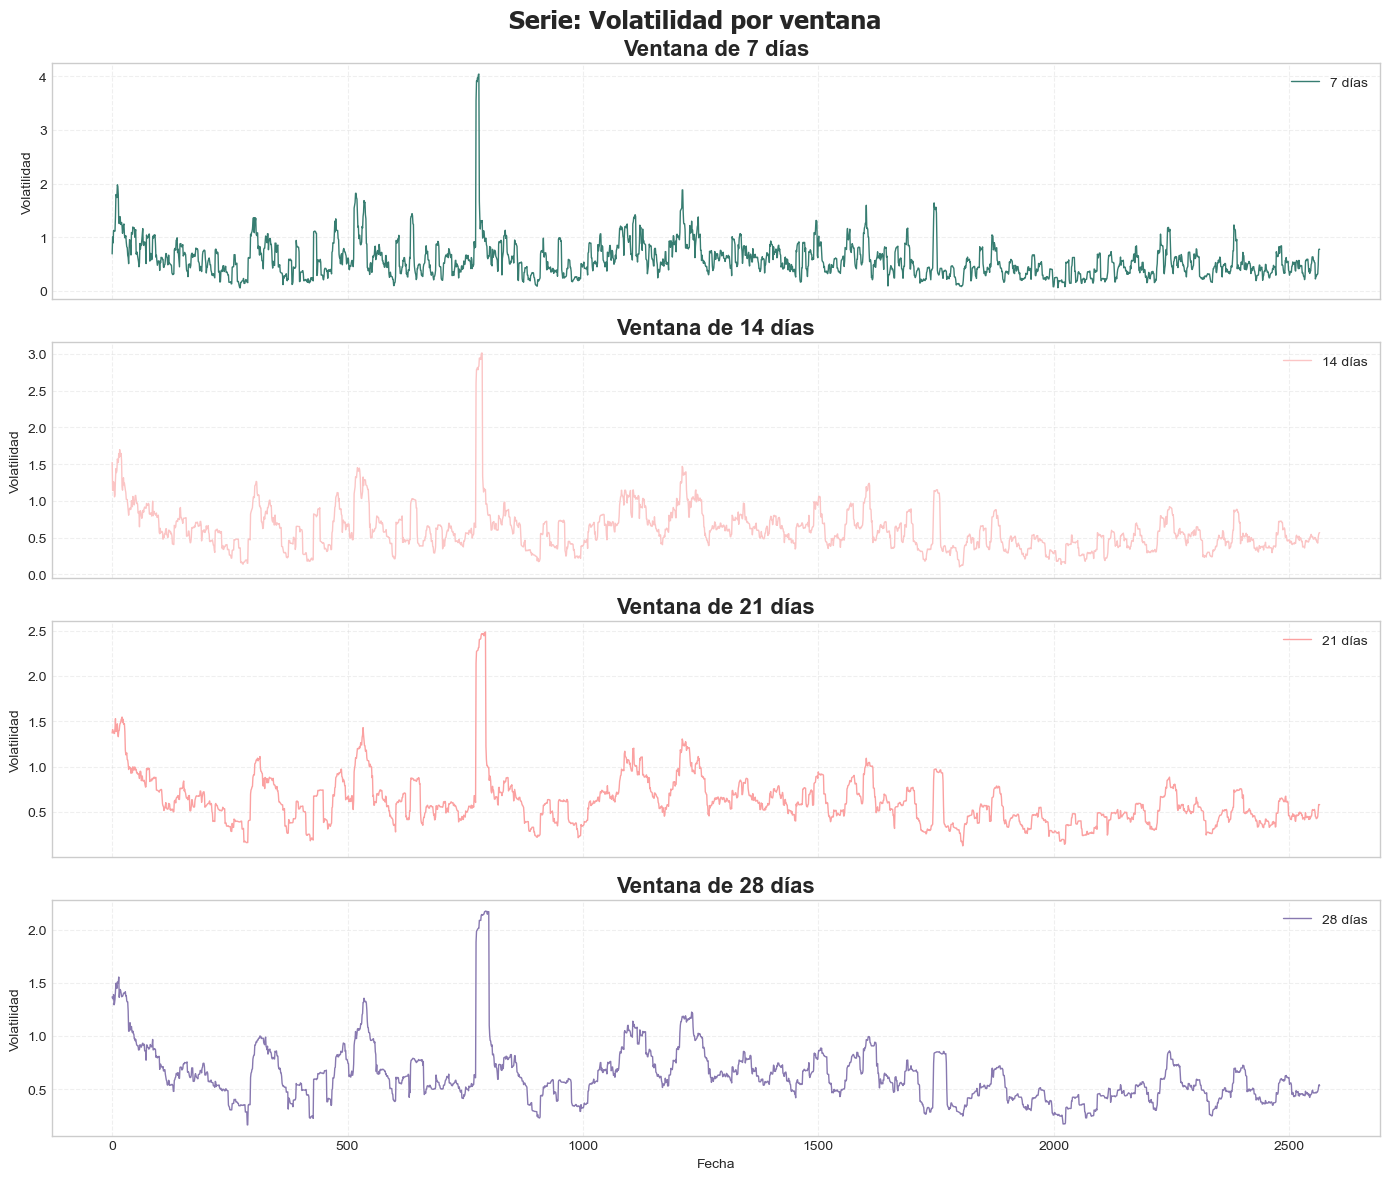

In [99]:
# [Gráfica] Serie: Volatilidad por ventana
colores=['#377D71','#FBC5C5', '#FBA1A1', '#8879B0']
fig, axes = plt.subplots(nrows=len(ventanas), ncols=1, figsize=(14, 12), sharex=True)

for i, v in enumerate(ventanas):
    col = f"Volatil_D{v}"
    axes[i].plot(btc.index, btc[col], label=f'{v} días', color=colores[i], linewidth=1)
    axes[i].set_title(f'Ventana de {v} días')
    axes[i].set_ylabel('Volatilidad')
    axes[i].legend()
    axes[i].grid(True, linestyle='--', alpha=0.3)

fig.suptitle('Serie: Volatilidad por ventana', fontsize=18, fontweight='bold', fontname='Tahoma')
plt.tight_layout(rect=[0, 0, 1, 0.97])
axes[-1].set_xlabel('Fecha')
plt.tight_layout()
plt.show()


La volatilidad para el horizonte semanas es más reactiva con picos más abruptos, capturando eventos extremos con alta sensibilidad. La ventana de 14 días tiene menor dispersión pero mostrando sensibilidad, filtrando una parte del ruido diario. Ya para la ventana de 21 días se evidencia picos más suavizados, con una dinámica más estructural. Por último, la ventana de 28 días, la volatilidad está más contenida con curvas suaves. 

La evolución de la volatilidad anualizada muestra entonces que los horizontes más cortos capturan con mayor intensidad los eventos extremos, mientras que los horizontes más amplio suavizan las fluctuaciones.


### Prueba normalidad

In [102]:
# [Test] Prueba de Shapiro y Jarque-Bera para verificar supuestos de normalidad
resultados = []

for v in ventanas:
    col = f"Volatil_D{v}"
    serie = btc[col].dropna()

    # Shapiro
    shapiro_stat, shapiro_p = shapiro(serie)
    # Jarque-Bera
    jb_stat, jb_p = jarque_bera(serie)

    resultados.append({
        'Ventana': f'{v}d',
        'Shapiro-Wilk (stat)': round(shapiro_stat, 4),
        'Shapiro-Wilk (p)': f"{shapiro_p:.4e}",
        'Jarque-Bera (stat)': round(jb_stat, 4),
        'Jarque-Bera (p)': f"{jb_p:.4e}"
    })

# Convertir a tabla
df_normalidad = pd.DataFrame(resultados).set_index('Ventana')
df_normalidad

,Shapiro-Wilk (stat),Shapiro-Wilk (p),Jarque-Bera (stat),Jarque-Bera (p)
Ventana,,,,
7d,0.8175,3.3458e-47,59722.7860,0.0000e+00
14d,0.8301,4.7016e-46,28403.7315,0.0000e+00
21d,0.8423,7.0816e-45,15006.0162,0.0000e+00
28d,0.8484,2.8766e-44,9325.4569,0.0000e+00


Las distribuciones de volatilidad anualizada por ventana no cumplen con los supuestos de normalidad, según las pruebas Shapiro-Wilk y Jarque-Bera. 

Para Shapiro, los valores del estadístico entre 0.81 y 0.85 indican una fuerte desviación de la normalidad. Todos los p-valores son extremadamente bajos, se rechaza la hipótesis nula de normalidad en todos los casos. En el caso de Jarque-Bera los estadísticos son múy elevados. 

In [ ]:
# [Test] Calcular asimetría y kurtosis
resultados = []
for v in ventanas:
    col = f"Volatil_D{v}"
    serie = btc[col].dropna()

    resultados.append({
        'Ventana': f'{v}d',
        'Asimetría': round(skew(serie), 4),
        'Curtosis': round(kurtosis(serie, fisher=False), 4)  # fisher=False → compara con normal (valor esperado = 3)
    })

df_asim_kurt = pd.DataFrame(resultados).set_index('Ventana')
df_asim_kurt


,Asimetría,Curtosis
Ventana,,
7d,3.0494,25.8341
14d,2.6499,18.4134
21d,2.3340,13.8887
28d,2.1402,11.3006


Para todas las ventanas, la distribución de volatilidad anualizada es asimétrica positiva con colas pesadas, más fuerte en las ventanas cortas, suavizándose para las ventanas más amplias. 

### Función de autocorrelación (ACF) de retornos

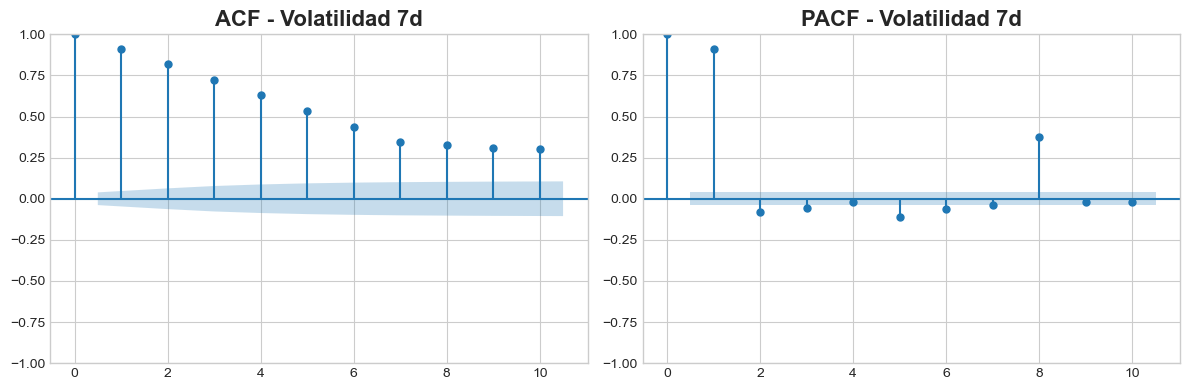

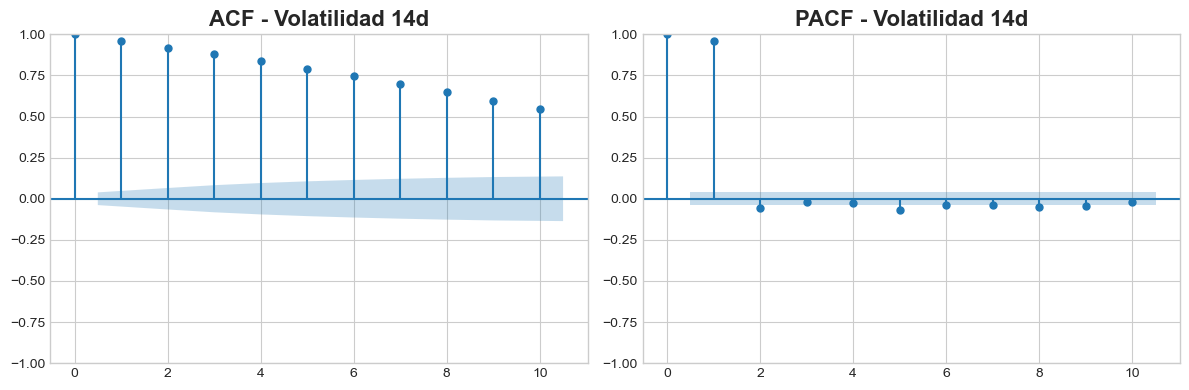

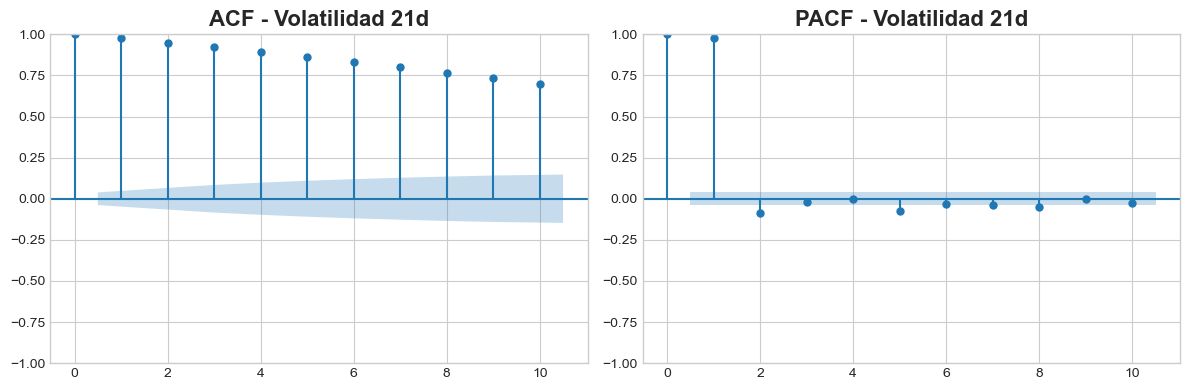

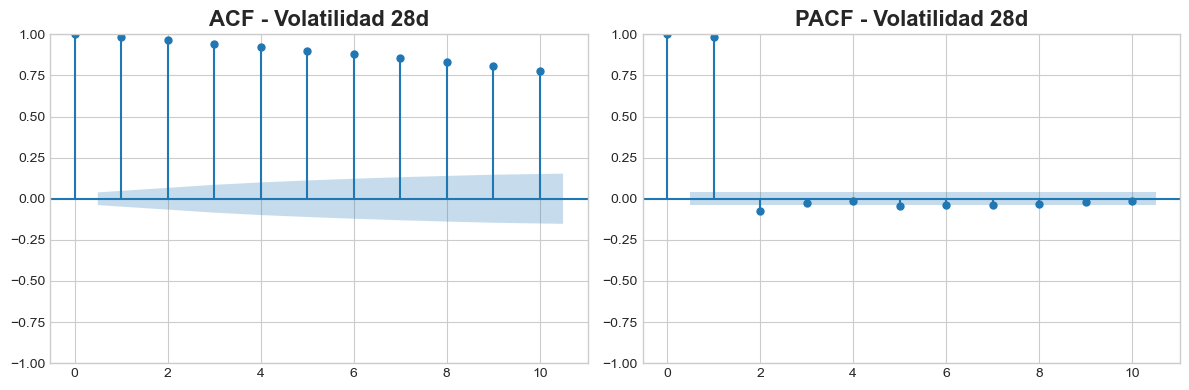

📊 Resultados de dependencia temporal por ventana:


,Ljung-Box stat,Ljung-Box p,Asimetría,Curtosis
Ventana,,,,
7d,8520.5384,0.0000e+00,3.0494,25.8341
14d,15375.8857,0.0000e+00,2.6499,18.4134
21d,18529.9222,0.0000e+00,2.3340,13.8887
28d,20294.3076,0.0000e+00,2.1402,11.3006


In [105]:
# [Test] ACF 
resultados = []

for v in ventanas:
    col = f"Volatil_D{v}"
    serie = btc[col].dropna()

    # Ljung-Box
    lb = acorr_ljungbox(serie, lags=[10], return_df=True)
    lb_stat = lb['lb_stat'].values[0]
    lb_p = lb['lb_pvalue'].values[0]

    # Asimetría y curtosis
    skewness = skew(serie)
    kurt = kurtosis(serie, fisher=False)

    resultados.append({
        'Ventana': f'{v}d',
        'Ljung-Box stat': round(lb_stat, 4),
        'Ljung-Box p': f"{lb_p:.4e}",
        'Asimetría': round(skewness, 4),
        'Curtosis': round(kurt, 4)
    })

    # ACF y PACF
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(serie, ax=axes[0], lags=10, title=f'ACF - Volatilidad {v}d')
    plot_pacf(serie, ax=axes[1], lags=10, title=f'PACF - Volatilidad {v}d')
    plt.tight_layout()
    plt.show()

# Tabla comparativa
df_resultados = pd.DataFrame(resultados).set_index('Ventana')
print("📊 Resultados de dependencia temporal por ventana:")
df_resultados

La serie de volatilidad anualizada con para todas las ventanas presenta autocorrelación significativa en múltiples rezagos.
